#### 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from pathlib import Path

In [2]:
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
print(mpl.rcParams['font.family'])
# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

NanumGothic
Nanum Pen
['Nanum Pen']


In [3]:
# 그래프 출력이 안될 시
%matplotlib inline

## Stack Overflow Annual Developer Survey

### ResponseId

In [373]:
survey_raw_df = pd.read_csv("data/survey_results_public.csv", index_col="ResponseId")
survey_raw_df.head(2)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


In [374]:
schema_raw = pd.read_csv("data/survey_results_schema.csv", index_col="qname")["question"]
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [375]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [376]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [377]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [378]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [379]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [380]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [381]:
selected_columns = [
# 인구 통계
'Country',
'Age',
'Gender',
'EdLevel',
# 프로그래밍 경험
'YearsCode',
'YearsCodePro',
'LanguageHaveWorkedWith',
'LanguageWantToWorkWith',
'LearnCodeCoursesCert',
'ProfessionalTech',
'SOAccount',
# 고용 관련 정보
'Employment',
'DevType',
'WorkExp',
]

In [382]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


### Columns

#### YearsCode

In [395]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [396]:
survey_df["YearsCode"].value_counts()

10.0    5217
5.0     5193
6.0     4651
4.0     4480
7.0     4237
8.0     4227
3.0     4122
2.0     3351
12.0    2995
15.0    2962
20.0    2659
9.0     2581
11.0    1819
14.0    1811
13.0    1624
25.0    1582
1.0     1566
0.0     1413
16.0    1406
30.0    1330
22.0    1176
18.0    1150
17.0    1080
40.0     777
24.0     752
35.0     742
23.0     644
19.0     563
26.0     489
27.0     485
21.0     483
28.0     425
32.0     371
38.0     288
37.0     277
34.0     241
36.0     236
33.0     229
42.0     216
29.0     208
51.0     172
31.0     170
45.0     167
39.0     159
41.0     143
43.0     115
44.0     104
50.0      68
46.0      57
47.0      42
48.0      41
49.0      35
Name: YearsCode, dtype: int64

In [397]:
print(schema_raw,["YearsCode"])

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object ['YearsCode']


In [398]:
count_nan(survey_df["YearsCode"])

1937

In [399]:
survey_df["YearsCode"].value_counts()

10.0    5217
5.0     5193
6.0     4651
4.0     4480
7.0     4237
8.0     4227
3.0     4122
2.0     3351
12.0    2995
15.0    2962
20.0    2659
9.0     2581
11.0    1819
14.0    1811
13.0    1624
25.0    1582
1.0     1566
0.0     1413
16.0    1406
30.0    1330
22.0    1176
18.0    1150
17.0    1080
40.0     777
24.0     752
35.0     742
23.0     644
19.0     563
26.0     489
27.0     485
21.0     483
28.0     425
32.0     371
38.0     288
37.0     277
34.0     241
36.0     236
33.0     229
42.0     216
29.0     208
51.0     172
31.0     170
45.0     167
39.0     159
41.0     143
43.0     115
44.0     104
50.0      68
46.0      57
47.0      42
48.0      41
49.0      35
Name: YearsCode, dtype: int64

In [400]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [401]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

#### Gender

In [402]:
schema_raw["Gender"]
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [403]:
survey_df.where(~(survey_df["Gender"].str.contains(';', na=False)), np.nan, inplace=True)

In [404]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [405]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [406]:
mpl.rcParams["font.family"] = "NanumGothic"
mpl.rcParams["axes.unicode_minus"] = False

#### Country

In [407]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [408]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [409]:
survey_df['Country'].nunique()

180

#### Age

In [410]:
schema_raw["Age"]

'What is your age?'

In [411]:
age_counts = survey_df["Age"].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [412]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [413]:
survey_df["Age"].nunique()

8

#### EdLevel

In [414]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [415]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

#### Employment

In [416]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

In [417]:
survey_df["Employment"].value_counts().head(15)

Employed, full-time                                                         42644
Student, full-time                                                           6663
Independent contractor, freelancer, or self-employed                         4941
Employed, full-time;Independent contractor, freelancer, or self-employed     3456
Not employed, but looking for work                                           1810
Student, full-time;Employed, part-time                                       1148
Employed, part-time                                                          1116
Student, part-time                                                           1036
Employed, full-time;Student, full-time                                        961
Employed, full-time;Student, part-time                                        932
Student, part-time;Employed, part-time                                        717
Student, full-time;Not employed, but looking for work                         715
Not employed, an

#### DevType

In [418]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

## 연습문제

### 작업에 들어가기 이전에 해당 column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수를 만들어 봅시다.
- series를 인자로 갖는 count_nan 함수를 만듭니다.
- 이 함수는 인자로 전달된 series의 NaN 개수를 반환해줍니다.

In [383]:
def count_nan(x):
    return x.isna().sum()

In [384]:
count_nan(survey_df["YearsCode"])

1937

### YearsCode

#### YearsCode의 'Less than 1 year'의 값은 0으로 변경하고 
'More than 50 years'의 값은 51로 일괄적으로 변경하려 합니다.  
또 dtype을 float로 변경하고 이를 survey_df["YearsCode"]에 적용해보세요.
- 아래의 Series의 메서드를 활용해보세요.
- 힌트: replace(변경 전 값, 변경 후 값, inplace=True)

In [385]:
# 1년 이하는 0으로 변경
survey_df["YearsCode"].replace("Less than 1 year", 0, inplace=True)
# 50년 초과는 51으로 변경
survey_df["YearsCode"].replace("More than 50 years", 51, inplace=True)
# Dtype을 float로 변경
survey_df["YearsCode"] = survey_df["YearsCode"].astype(float)

In [386]:
survey_df["YearsCode"]

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

#### YearsCodePro의 column도 YearsCode와 동일하게 일괄적으로 변경하려 합니다.  
또 dtype을 float로 변경하고 이를 survey_df["YearsCodePro"]에 적용해보세요.

In [387]:
# 1년 이하는 0으로 변경
survey_df["YearsCodePro"].replace("Less than 1 year", 0, inplace=True)
# 50년 초과는 51으로 변경
survey_df["YearsCodePro"].replace("More than 50 years", 51, inplace=True)
# Dtype을 float로 변경
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype(float)

In [388]:
survey_df["YearsCodePro"]

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

### 설문 응답자가 속한 국가중 응답자 수 상위 15개 국가를 아래와 같이 구해보세요.

In [389]:
top_contries = survey_df['Country'].value_counts().head(15)
top_contries

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

In [390]:
survey_df['Country'].value_counts()[:15]

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

### 앞의 연습 문제에서 구한 값을 가지고 다음의 차트를 작성해보세요.
- xticks의 글자를 회전시키려면 rotation키워드 인수에 각도를 의미하는 정수 값을 입력하면 됩니다.

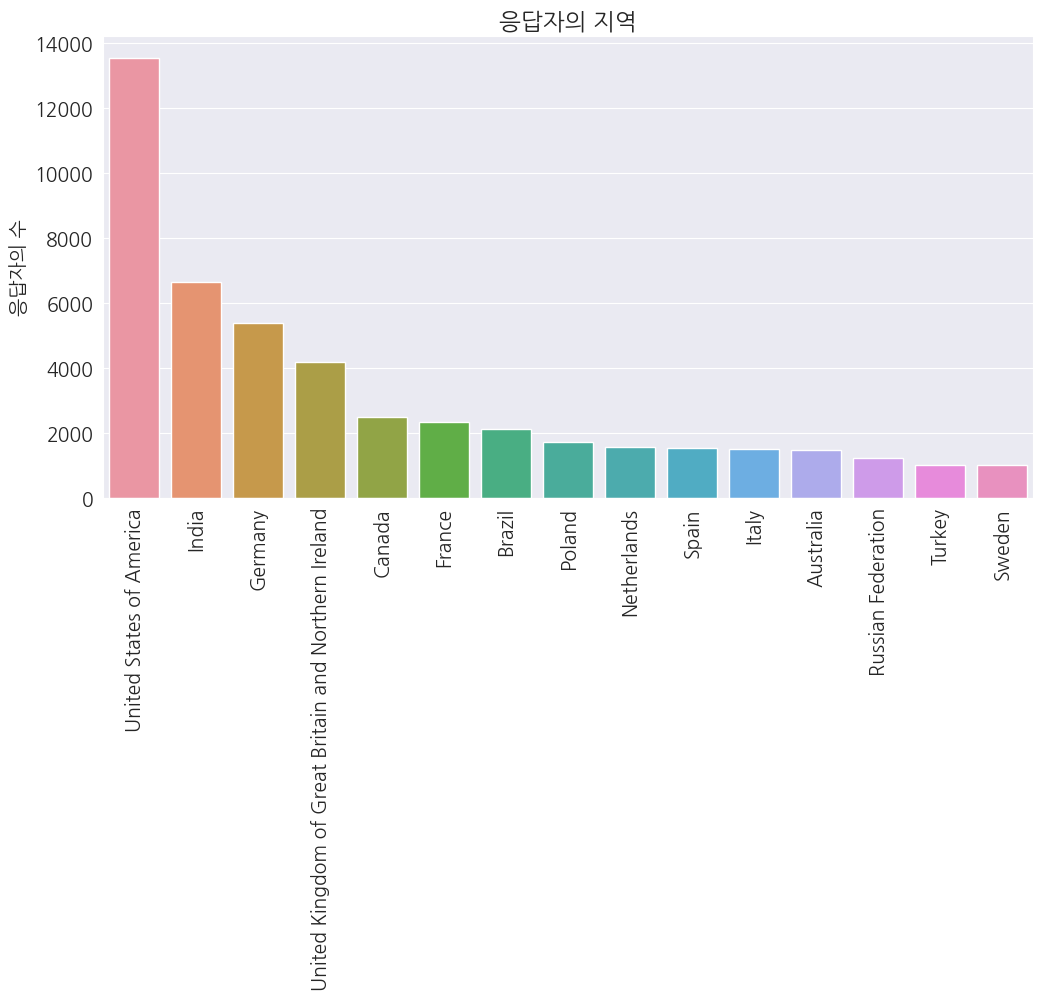

In [391]:
# figure 사이즈를 12 x 6 으로 설정합니다.
plt.figure(figsize=(12,6))
plt.title("응답자의 지역")
# rotation=90은 글자를 반시계 방향으로 90도 회전시킵니다.
plt.xticks(rotation=90)
sns.barplot(x=top_contries.index ,y=top_contries)
plt.ylabel("응답자의 수")
plt.show()

### 연령의 분포가 한눈에 들어오도록 아래와 같이 그래프를 출력해보세요.
x축의 출력하는 데이터의 순서도 고려하여 작성해야 합니다.

In [392]:
age_order = [
    'Under 18 years old', '25-34 years old', '35-44 years old', 
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say']
    

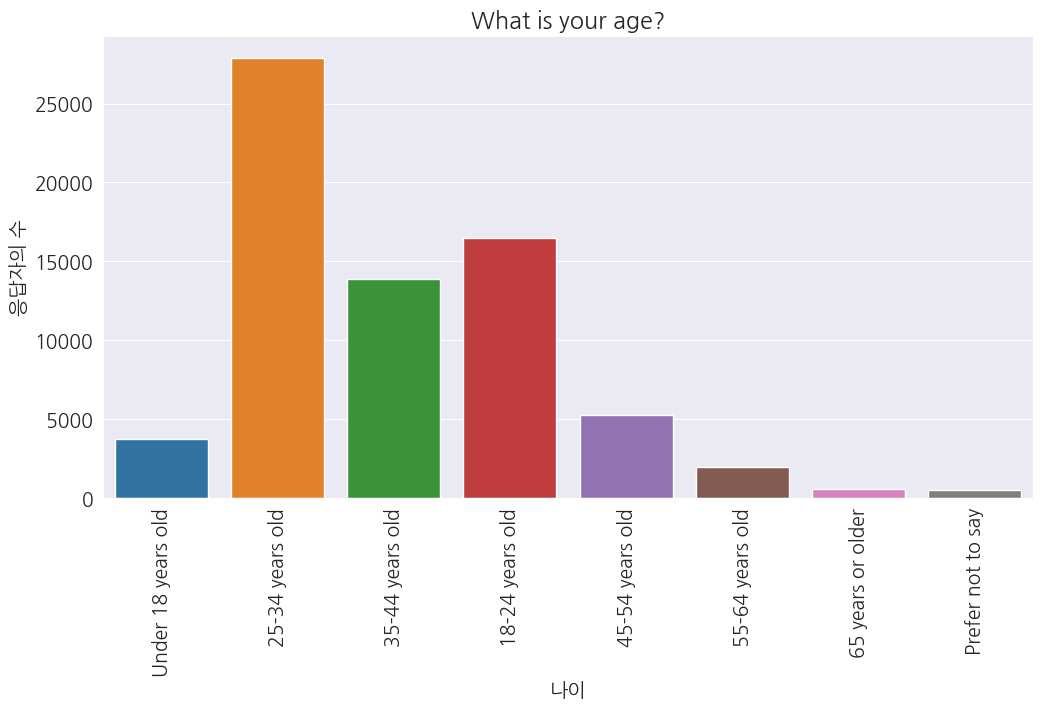

In [393]:
plt.figure(figsize=(12,6))
plt.title(schema_raw["Age"])
plt.xticks(rotation=90)
sns.barplot(x=age_counts.index, y=age_counts.values, order=age_order)
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

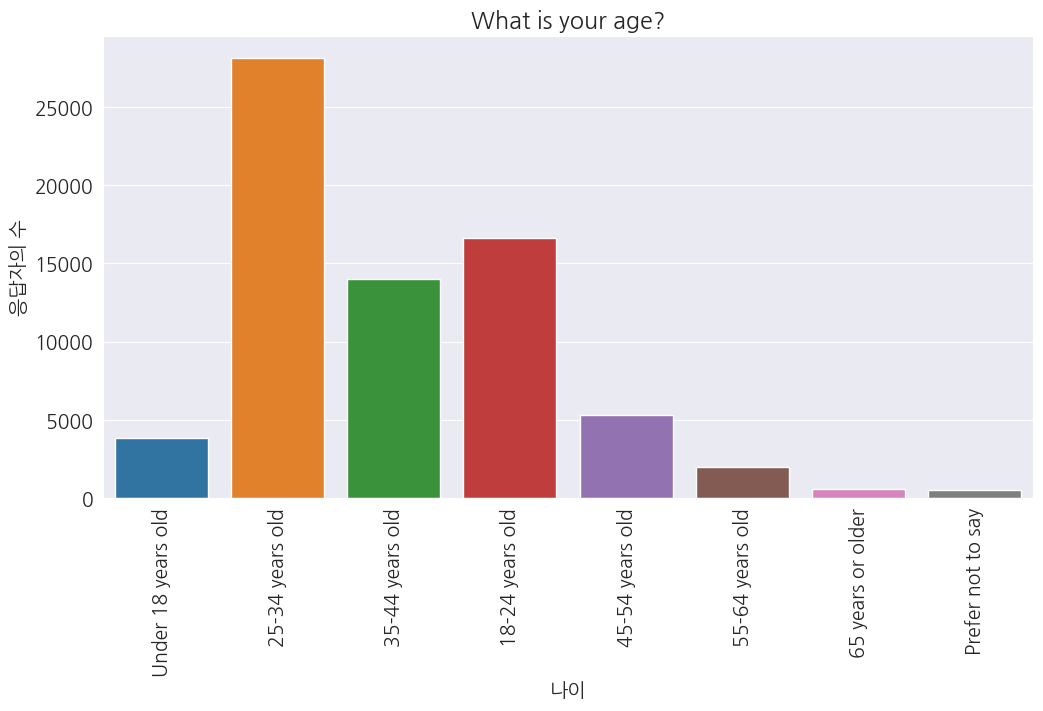

In [394]:
plt.figure(figsize=(12,6))
plt.title(schema_raw["Age"])
plt.xticks(rotation=90)
sns.countplot(data=survey_df, x="Age", order=age_order)
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

### 앞의 데이터를 활용하여 아래와 같이 파이 플롯을 작성해보세요.

In [ ]:
plt.style.use("default")
mpl.rcParams["axes.facecolor"] = "white"
gender_counts = survey_df["Gender"].value_counts(True)

In [ ]:
plt.title(schema_raw["Gender"])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

### 아래 보이는 그래프를 출력하는 코드를 구현해보세요.

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
sns.countplot(y=survey_df["EdLevel"])
plt.show()

### 아래 보이는 그래프를 출력하는 코드를 구연해보세요.
- y축 순서 고려하세요.
- y축의 단위가 퍼센트로 변경됐습니다.

In [ ]:
EdLevel_pct = survey_df.EdLevel.value_counts(True)*100
EdLevel_pct

In [ ]:
sns.barplot(x=EdLevel_pct, y=EdLevel_pct.index)
plt.title(schema_raw["EdLevel"])
plt.ylabel(None);
plt.xlabel('Percentage');
plt.show()

### 고용 형태(Employment)에 대한 상위 15개 항목에 대한 그래프를 아래와 같이 구현해보세요.

In [27]:
Employment_pct = survey_df.Employment.value_counts(True).head(15)*100
Employment_pct

Employed, full-time                                                         59.911587
Student, full-time                                                           9.421412
Independent contractor, freelancer, or self-employed                         6.941946
Employed, full-time;Independent contractor, freelancer, or self-employed     4.861314
Not employed, but looking for work                                           2.553375
Student, full-time;Employed, part-time                                       1.628805
Employed, part-time                                                          1.578602
Student, part-time                                                           1.457279
Employed, full-time;Student, full-time                                       1.355478
Employed, full-time;Student, part-time                                       1.319221
Student, full-time;Not employed, but looking for work                        1.016609
Student, part-time;Employed, part-time                

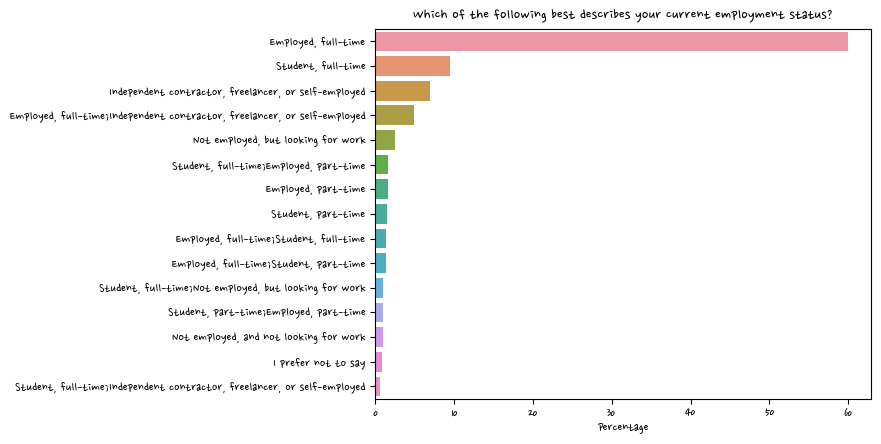

In [28]:
sns.barplot(x = Employment_pct, y = Employment_pct.index)
plt.title(schema_raw['Employment'])
plt.xlabel('Percentage')
plt.show()

### 즉 DevType column을 제일 작은 단위의 응답 항목으로 나누어 DataFrame 형태로 만들어 보도록 하겠습니다.
- Series를 인자로 받아옵니다.
- value의 구분자는 ';'입니다.
- Series는 items() 메서드를 사용하여 루프할 수 있습니다.
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 줍니다.
- 응답자가 제일 작은 단위의 기술 스텍을 선택한 경우 해당 열의 값을 True로 아닌 경우 False로 합니다.

In [566]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [141]:
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp
result = list(set(temp))
result

['Project manager',
 'Engineering manager',
 'Developer, back-end',
 'Academic researcher',
 'Engineer, site reliability',
 'Developer, mobile',
 'Scientist',
 'Developer, QA or test',
 'Data or business analyst',
 'Educator',
 'DevOps specialist',
 'Database administrator',
 'Developer, front-end',
 'Cloud infrastructure engineer',
 'Developer, desktop or enterprise applications',
 'Other (please specify):',
 'Developer, game or graphics',
 'Developer, full-stack',
 'Senior Executive (C-Suite, VP, etc.)',
 'Engineer, data',
 'Student',
 'System administrator',
 'Security professional',
 'Designer',
 'Blockchain',
 'Marketing or sales professional',
 'Developer, embedded applications or devices',
 'Data scientist or machine learning specialist',
 'Product manager']

In [489]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


### 각 역할별로 개수를 갖는 오른쪽과 같은 결과를 갖는 Series를 만들어보세요.
- 앞서 구한 데이터프레임을 활용하여 column 별 집계(sum)를 이용합니다.

In [490]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)

### 각 역할별로 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 Series를 만들어 보세요.
- 전체 합이 100이 되어야 합니다.
- devtype_percentage로 명명합니다.

In [496]:
dev_type_totals/dev_type_totals.sum()*100
devtype_percentage = dev_type_totals = dev_type_totals/dev_type_totals.sum()*100

In [497]:
devtype_percentage.sum()

100.0

### 각 역학별 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 그래프를 그려보세요.
- figsize: 12x12
- xlabel: Percentage
- ylabel: None

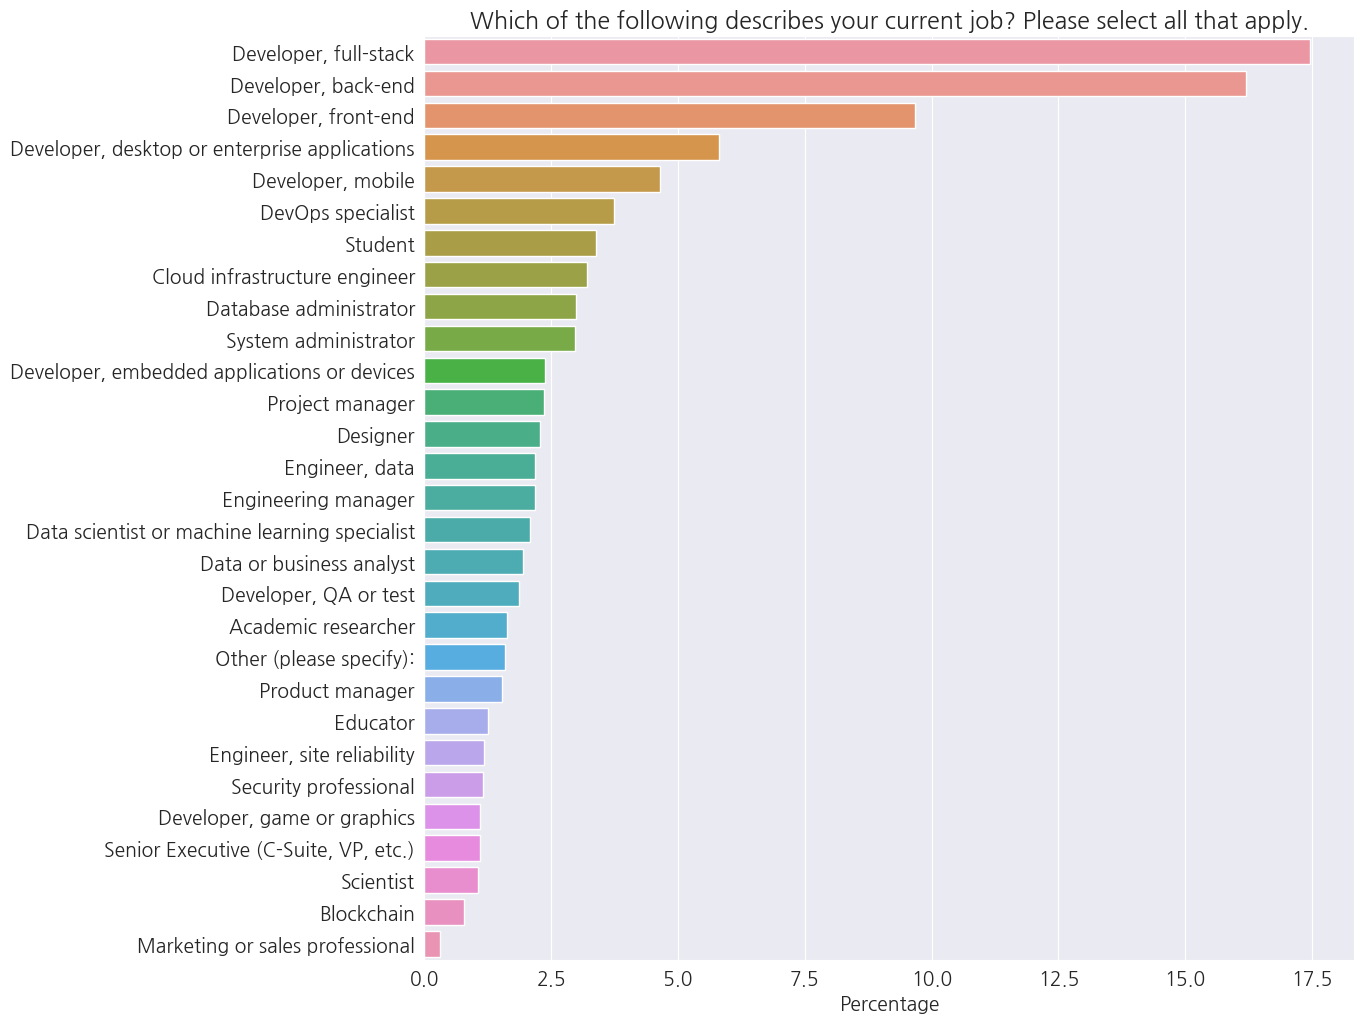

In [327]:
plt.figure(figsize=(12, 12))
sns.barplot(x = devtype_percentage, y = devtype_percentage.index)

plt.title(schema_raw.DevType)
plt.xlabel('Percentage')
plt.ylabel(None);
plt.show()

### 2022년 가장 인기 있는 프로그래밍 언어는 무엇입니까?
- LanguageHaveWorkedWith 열을 이용해서 그래프로 그려보세요.
- 내림차순으로 정렬합니다.
- figure size는 12x12 입니다.
- x축은 퍼센트 y축은 기술 스텍별 카테고리입니다.

In [563]:
def split_multicolumn(col_series2):
    result_df = pd.DataFrame(col_series2.values, index=col_series2.index, columns=["col_series2"])
    options = []
    for idx, value  in col_series2[col_series2.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
lhww_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [564]:
lhww_totals = lhww_df.sum().sort_values(ascending=False)
lhww_totals/lhww_totals.sum()*100
lhww_percentage = lhww_totals = lhww_totals/lhww_totals.sum()*100

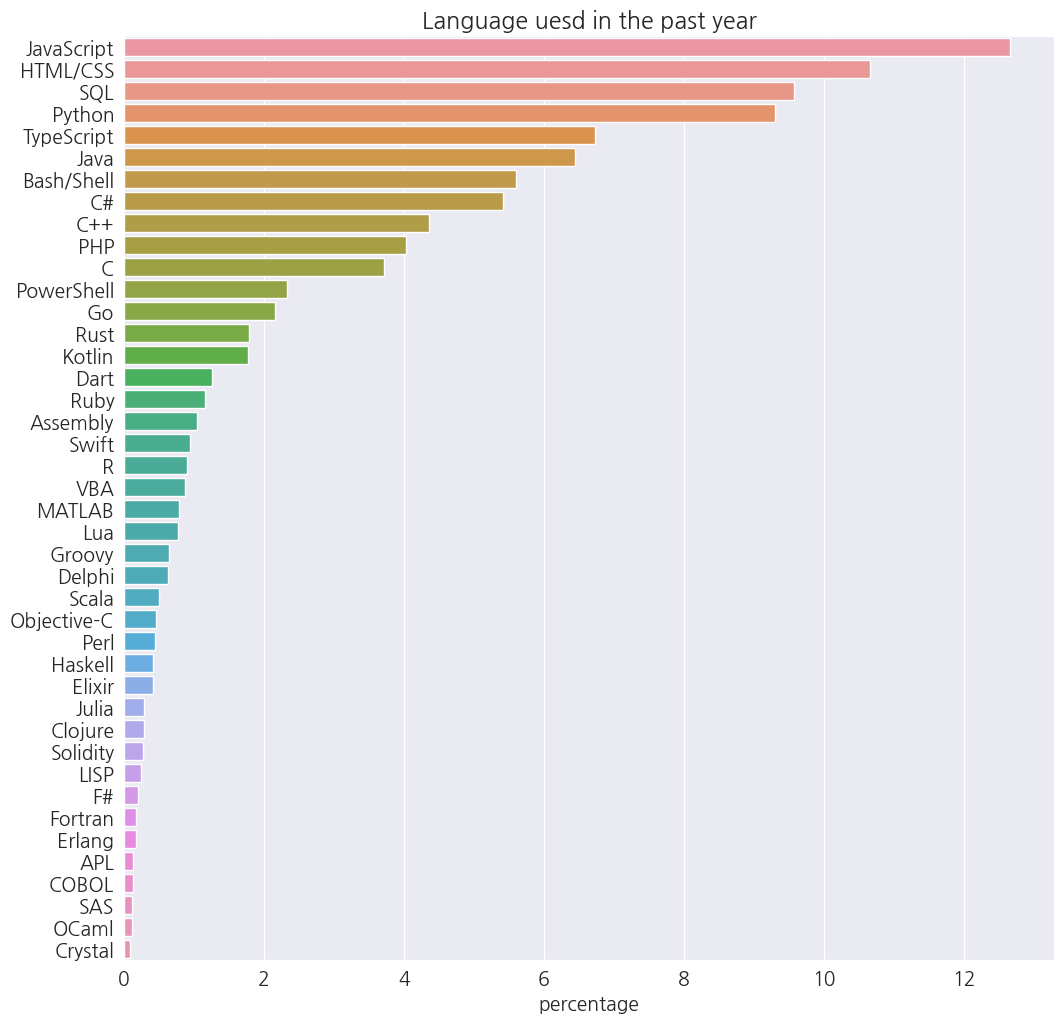

In [565]:
plt.figure(figsize=(12, 12))
sns.barplot(x = lhww_percentage, y = lhww_percentage.index)
plt.title('Language uesd in the past year')
plt.xlabel('percentage')
plt.show()

### 사는 곳이 한국인 응답자의 기술 스텍의 분포를 구해보세요.
- South Korea인 사람의 분포만 다시 그리면 됩니다.

In [480]:
home_country = survey_df[(survey_df.Country == 'South Korea') | (survey_df.Country == 'South Korea')]
hclww = split_multicolumn(home_country.LanguageHaveWorkedWith)
hclww_totals = hclww.sum().sort_values(ascending=False)
hclww_percentage = hclww_totals = hclww_totals/hclww_totals.sum()*100

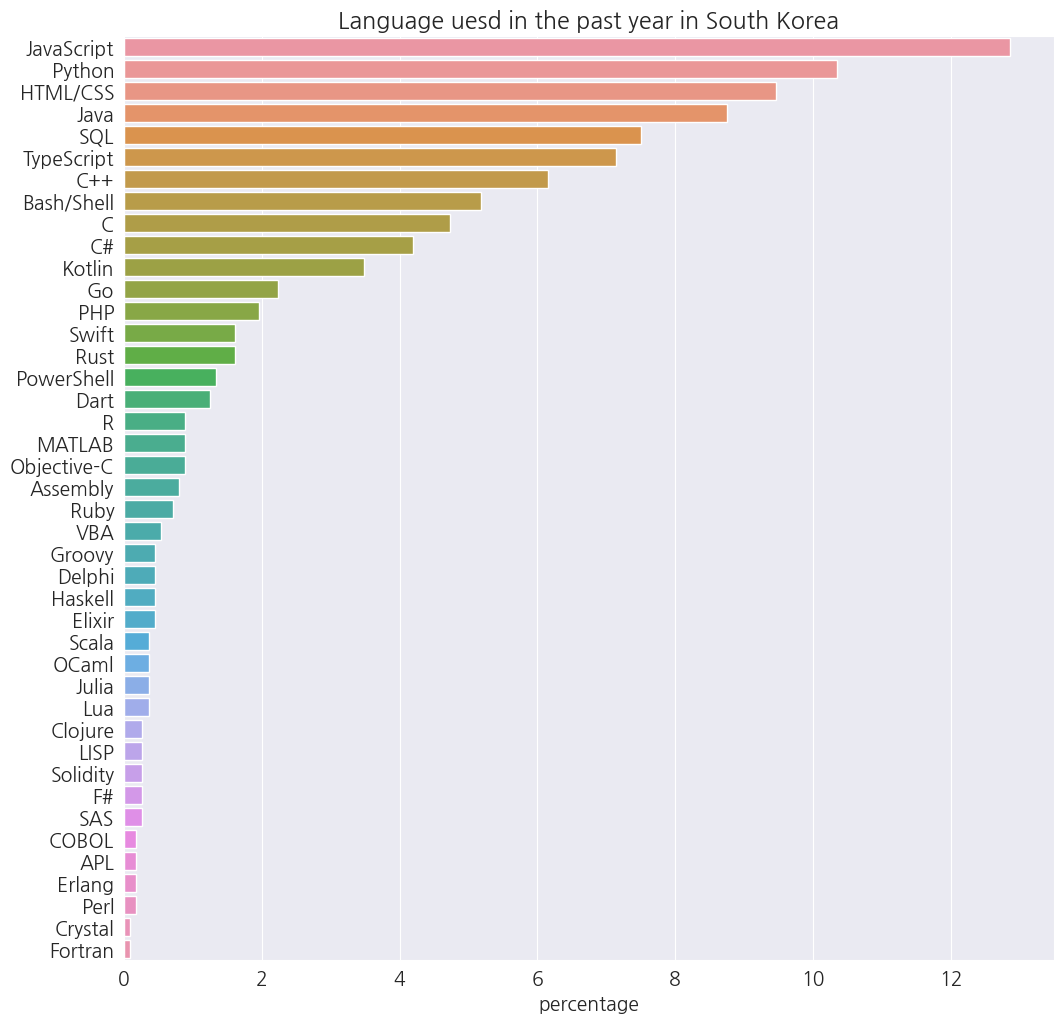

In [481]:
plt.figure(figsize=(12, 12))
sns.barplot(x = hclww_percentage, y = hclww_percentage.index)
plt.title('Language uesd in the past year in South Korea')
plt.xlabel('percentage')
plt.show()

### 데이터 사이언스 관련 분야에서 일하는 응답자들이 가장 많이 사용하는 언어는 무엇인지 구해보세요.
- DevType이 'Data scientist or machine learning specialist'인 대상자를 상대로 구하면 됩니다.

In [509]:
DsMls = survey_df[survey_df.DevType == 'Data scientist or machine learning specialist']
DsMls_language = split_multicolumn(DsMls.LanguageHaveWorkedWith)
DsMls_totals = DsMls_language.sum().sort_values(ascending=False)
DsMls_percentage = DsMls_totals = DsMls_totals/DsMls_totals.sum()*100
DsMls_percentage.sum()

99.99999999999997

In [506]:
data_science_folks = survey_df[survey_df.DevType.str.contains('Data scientist or machine learning specialist',na=False)]
data_science_folks_language = split_multicolumn(data_science_folks.LanguageHaveWorkedWith)
data_science_folks_language_totals = data_science_folks_language.sum().sort_values(ascending=False)
data_science_folks_language_percentage = data_science_folks_language_totals/data_science_folks_language_totals.sum()*100
data_science_folks_language_percentage.sum()

100.0

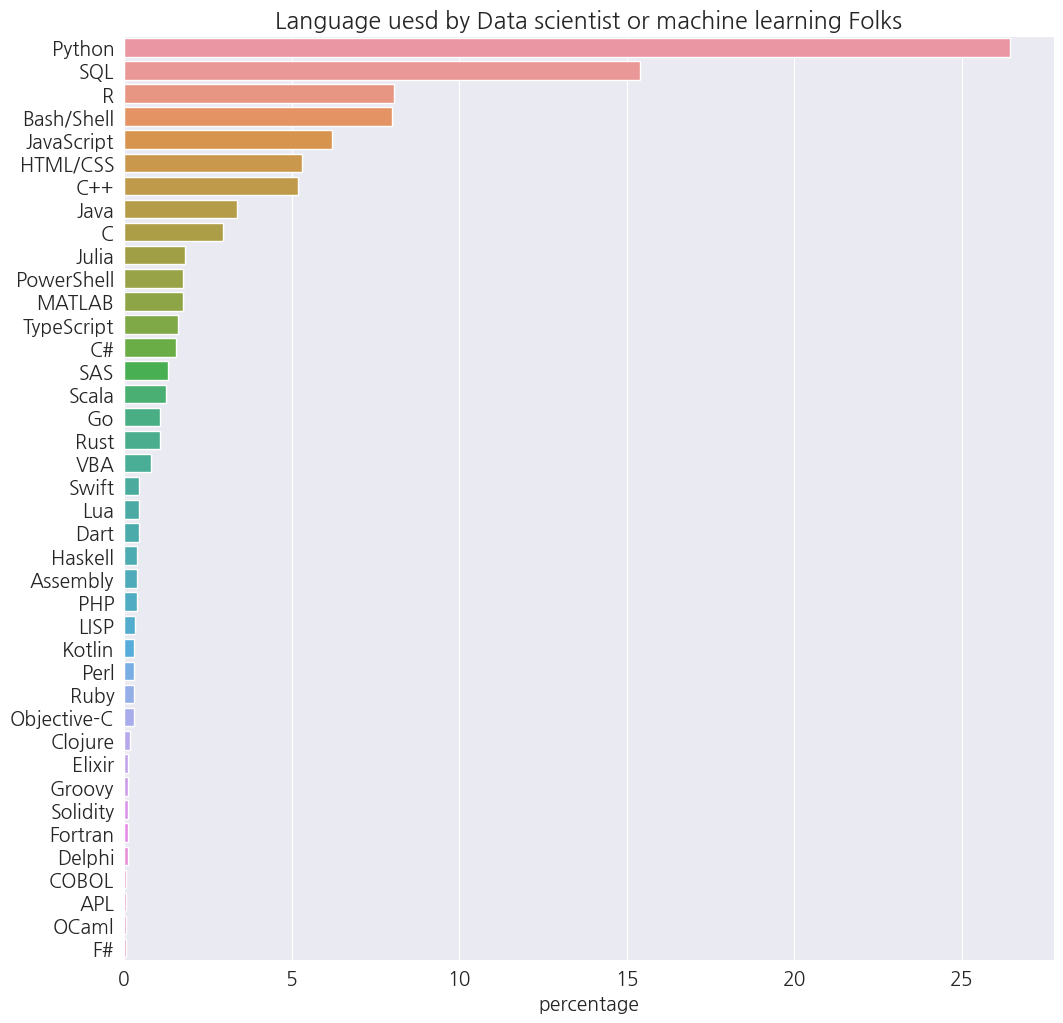

In [498]:
plt.figure(figsize=(12, 12))
sns.barplot(x = DsMls_percentage, y = DsMls_percentage.index)
plt.title('Language uesd by Data scientist or machine learning Folks')
plt.xlabel('percentage')
plt.show()

### 네년에 가장 많은 사람들이 배우고 싶어하는 언어는 무엇일까요?  
x축을 전체에서 차지하는 비울로 하는 그래프로 표현해보세요.
```python
survey_df.LanguageWantToWorkWith
```

In [567]:
def split_multicolumn(col_series):
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["col_series"])
    options = []
    for idx, value  in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

In [562]:
LWTWW_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
LWTWW_totals = LWTWW_df.sum().sort_values(ascending=False)
LWTWW_percentage = LWTWW_totals/LWTWW_totals.sum()*100
LWTWW_percentage.sum()

99.99999999999999

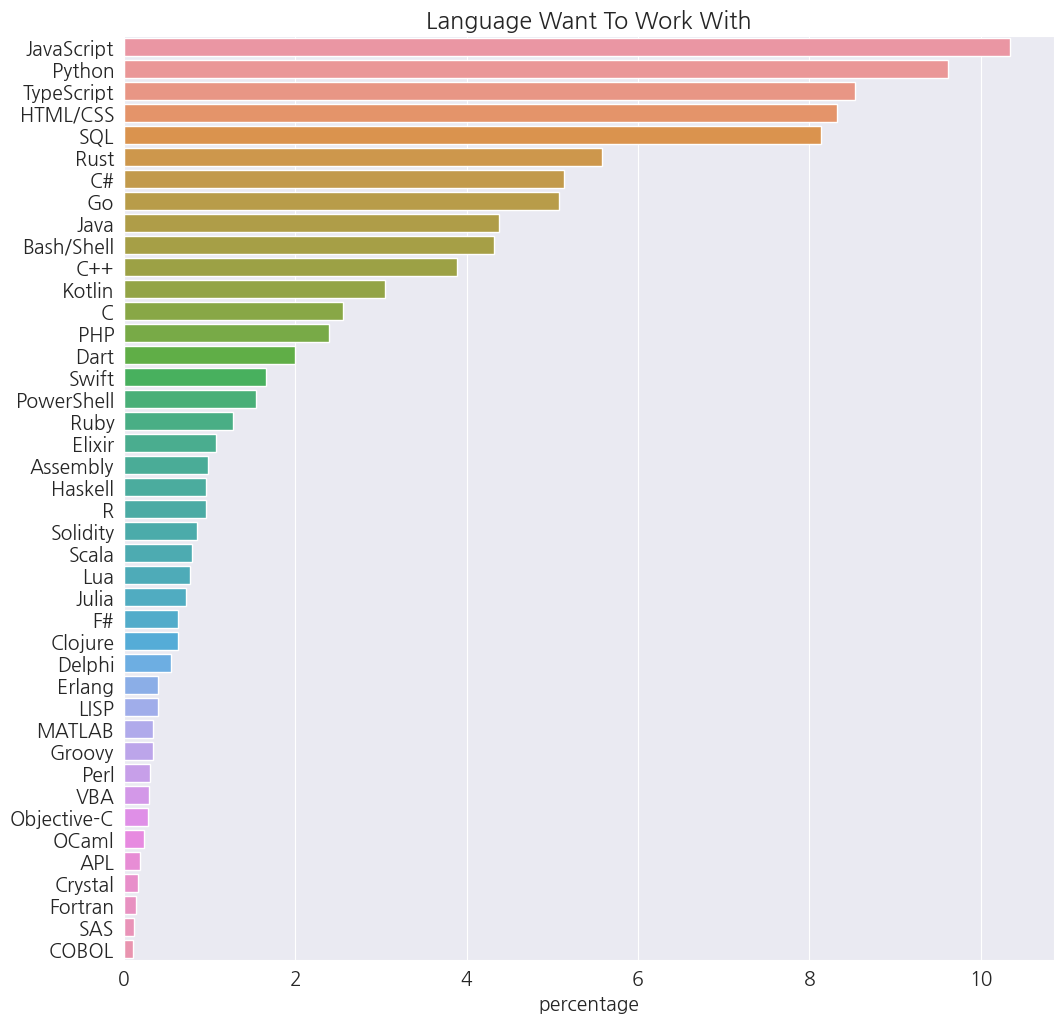

In [560]:
plt.figure(figsize=(12, 12))
sns.barplot(x = LWTWW_percentage, y = LWTWW_percentage.index)
plt.title('Language Want To Work With')
plt.xlabel('percentage')
plt.show()

### 2022년 데이터베이스에 가장 많이 사용되는 언어는 무엇입니까?
x축을 전체에서차지하는 비율로 하는 그래프로 표현해보세요.
```python
survey_raw_df.DatabaseHaveWorkedWith
```

In [569]:
DbHWW_df = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
DbHWW_totals = DbHWW_df.sum().sort_values(ascending=False)
DbHWW_percentage = DbHWW_totals/DbHWW_totals.sum()*100
DbHWW_percentage.sum()

100.0

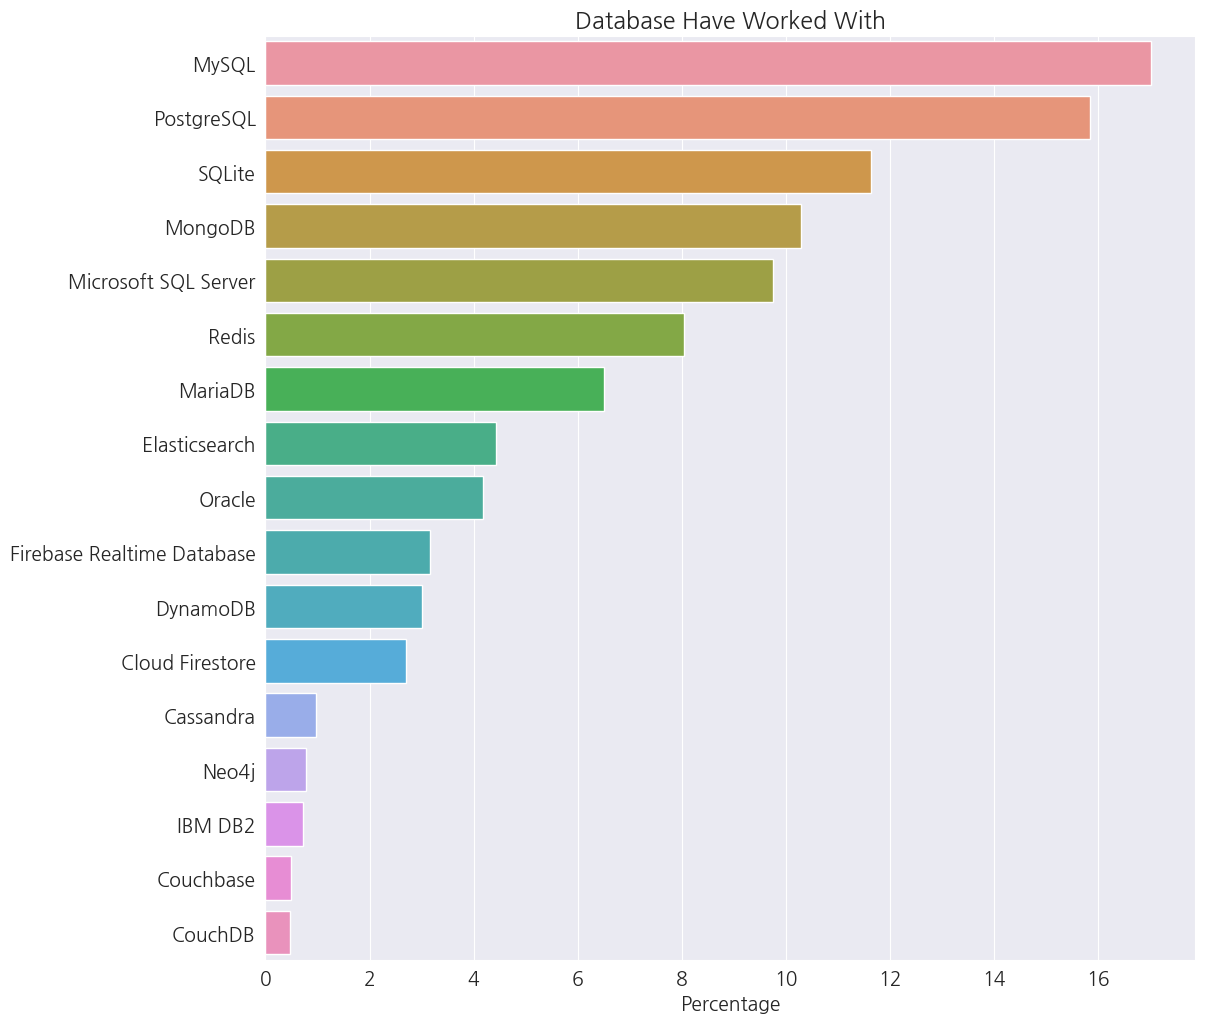

In [571]:
plt.figure(figsize=(12,12))
sns.barplot(x=DbHWW_percentage, y=DbHWW_percentage.index)
plt.title("Database Have Worked With")
plt.xlabel("Percentage")
plt.show()